# Hackathon #1 Spring 2024

**Background:** High-energy collisions at the Large Hadron Collider (LHC) <br> produce particles that interact with particle detectors. One important task is <br>
to classify different types of collisions based on their physics content,<br> allowing physicists to find patterns in the data and to potentially unravel new <br> discoveries.

**Problem statement:** The discovery of the Higgs boson by CMS and ATLAS <br>
Collaborations was announced at CERN in 2012. In this challenge, we will use <br>
machine learning to classify events containing Higgs bosons from the background <br>
events which do not contain Higgs bosons.

**Dataset:** The dataset is hosted by the Center for Machine Learning  <br>
and Intelligent Systems at University of California, Irvine. <br>
The dataset can be found on the [UCI Machine learning Repository](https://archive.ics.uci.edu/ml/datasets/HIGGS)

**Description:** The dataset consists of a total of 11 million labeled samples <br>
of Higgs and background events produced by Monte Carlo simulations. Each sample <br>
consists of 28 features. The first 21 features are kinematic properties <br>
of the events. The last seven are functions of the first 21. The data labels <br>
are 1 for signal (an event with Higgs bosons) and 0 for background (an event <br>
without Higgs bosons).

**Steps to load the training dataset**
1. Download the dataset from the UCI website.

In [ ]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz

--2024-02-20 21:46:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘HIGGS.csv.gz’

HIGGS.csv.gz            [    <=>             ]   2.62G  19.0MB/s    in 2m 23s  

2024-02-20 21:49:00 (18.7 MB/s) - ‘HIGGS.csv.gz’ saved [2816407858]



2. Unzip the dataset folder

In [ ]:
 #!gzip -d HIGGS.csv.gz

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
import matplotlib.pyplot as plt

**Load the file using pandas library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/HIGGS.csv.gz', compression='gzip', header=None)

The first column is the labels (y). The other columns are all of our inputs (X).

The above dataset is a pandas dataframe. We can access the data using iloc. <br>
After that, we can turn it into a numpy array if we want or leave it as a <br>
pandas dataframe.


In [ ]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
#X = X.to_numpy(dtype=float) #Convert pandas dataframe to numpy array (optional)
#y = y.to_numpy(dtype=int)   #Convert pandas dataframe to numpy array (optional)

In [ ]:
print(X.shape)

(11000000, 28)


To generate the following examples we used a smaller dataset containing only <br>
10,000 events. Final task will use full dataset.

In [ ]:
#X = X[:11000]
#y = y[:11000]

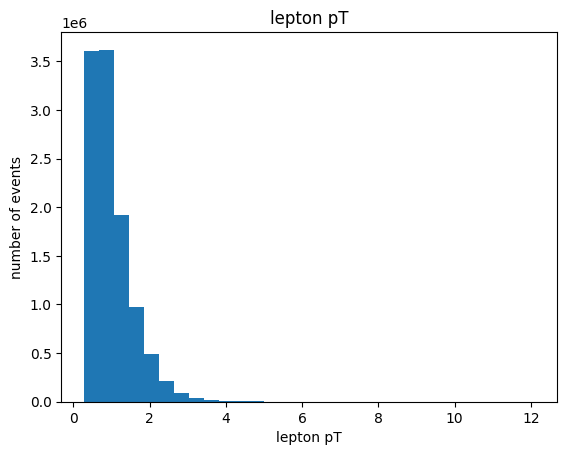

In [ ]:
plt.hist(X.iloc[:,0], bins=30)
plt.title("lepton pT")
plt.xlabel("lepton pT")
plt.ylabel("number of events")
plt.show()

Next we can split our data into 80% training data, 10% validation data, 10% <br>
test data.

We will use `X_train`, `X_val`, `X_test` as input <br>
data and `y_train`, `y_val`, `y_test` as output data.

In [ ]:
X_train, X_val1, y_train, y_val1 = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val1, y_val1, test_size=0.5, random_state=42)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(8800000, 28)
(1100000, 28)
(1100000, 28)
(8800000,)
(1100000,)
(1100000,)


## Task 1:

Data: `X_train`

Generate histograms of the different variables in `X_train` with proper axis <br>
labels and titles.

Detailed information on what each feature column is can be found in <br> *Attribute Information* section on the [UCI Machine learning Repository](https://archive.ics.uci.edu/ml/datasets/HIGGS). <br>
For further information, refer to the [paper](https://www.nature.com/articles/ncomms5308) by Baldi et. al



`names = ["lepton pT", "lepton eta", "lepton phi", "missing energy magnitude",` <br>
`"missing energy phi", "jet 1 pt", "jet 1 eta", "jet 1 phi", "jet 1 b-tag",` <br>
`"jet 2 pt", "jet 2 eta","jet 2 phi", "jet 2 b-tag", "jet 3 pt", "jet 3 eta",` <br>
`"jet 3 phi", "jet 3 b-tag", "jet 4 pt", "jet 4 eta", "jet 4 phi", "jet 4 b-tag",`<br>` "m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"]`

`for index, name in enumerate(names):`

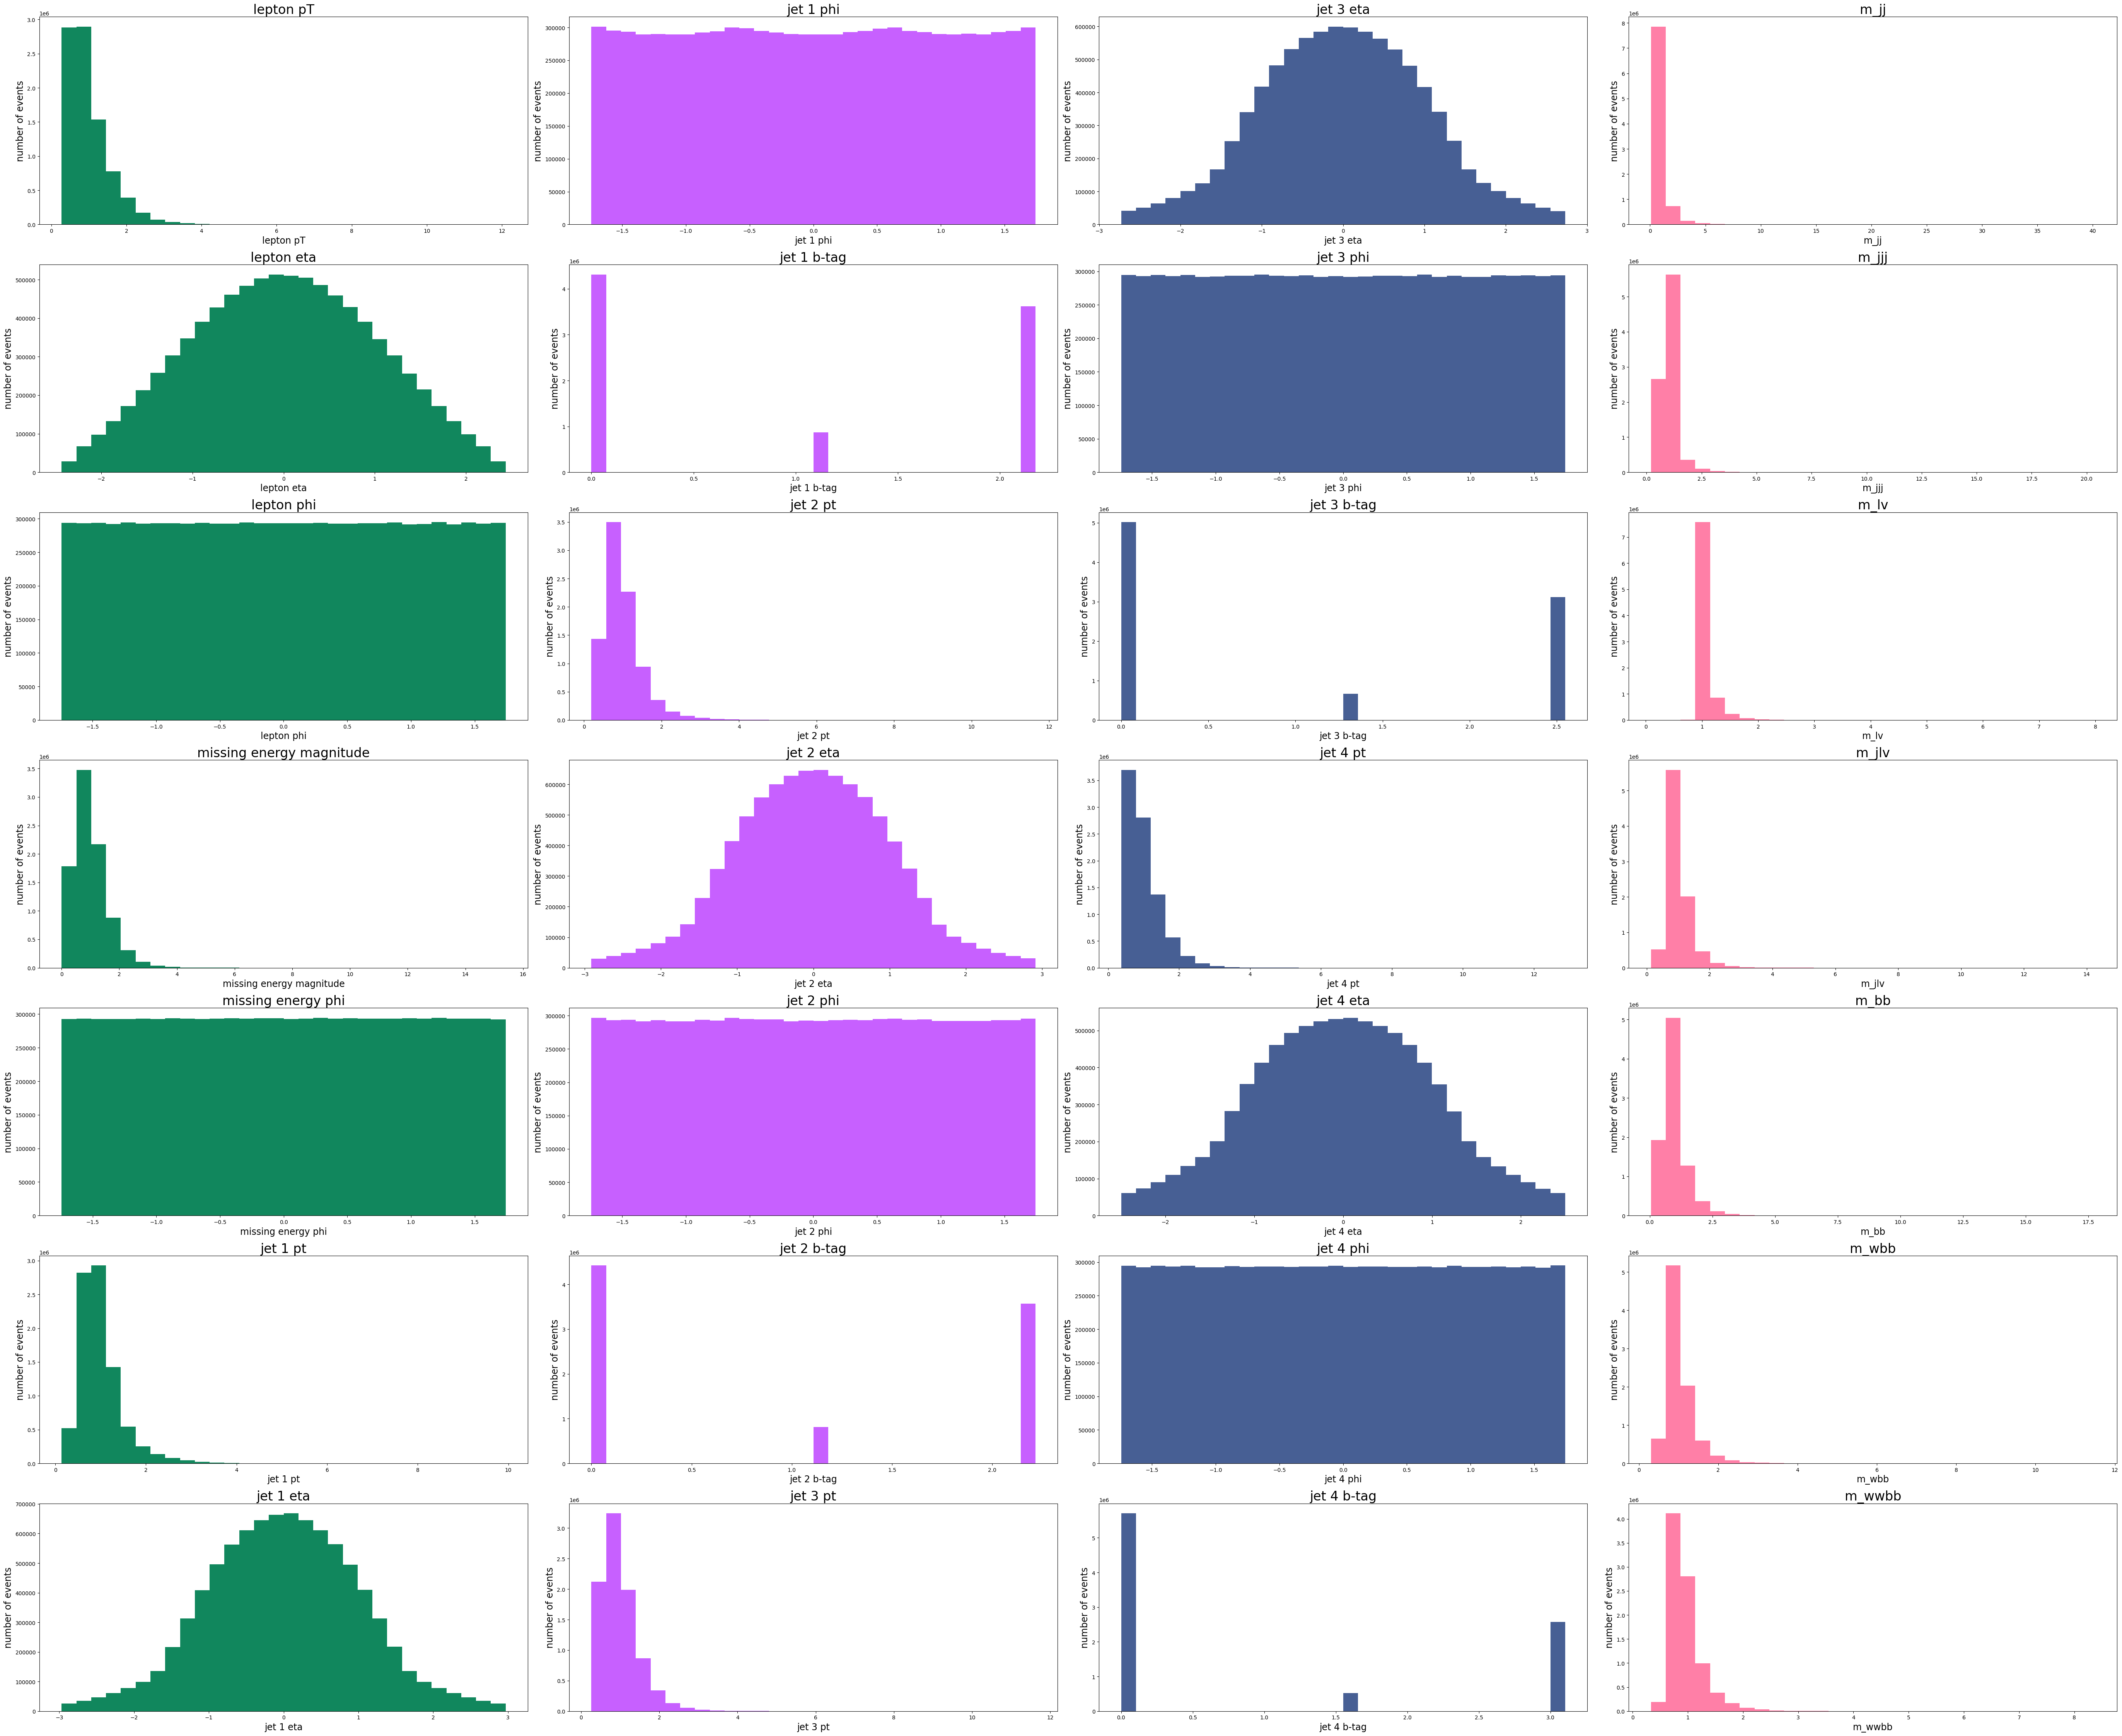

In [ ]:
names = ["lepton pT", "lepton eta", "lepton phi", "missing energy magnitude","missing energy phi", "jet 1 pt", "jet 1 eta", "jet 1 phi", "jet 1 b-tag","jet 2 pt", "jet 2 eta","jet 2 phi", "jet 2 b-tag", "jet 3 pt", "jet 3 eta","jet 3 phi", "jet 3 b-tag", "jet 4 pt", "jet 4 eta", "jet 4 phi", "jet 4 b-tag","m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"]
colors = ['xkcd:dark sea green', 'xkcd:bright lavender', 'xkcd:dusky blue', 'xkcd:carnation pink']

fig, axs =  plt.subplots(7, 4, figsize=(55, 45))
for index, name in enumerate(names):
  i = index % 7
  j = index // 7

  axs[i,j].hist(X_train.iloc[:,index], bins=30, color = colors[j])
  axs[i,j].set_title(name,  fontsize=24)
  axs[i,j].set_xlabel(name,  fontsize=17)
  axs[i,j].set_ylabel("number of events",  fontsize=17)

plt.tight_layout()


## Task 2:

Data: `X_train`, `y_train`, `X_val`, `y_val`

Train a model by fitting it to the training data. Use at least one metric <br>
such as roc_auc_score, accuracy, etc. to analyze the model's performance on the <br>
validation data. Using that performance metric, optimize or improve your model. <br>
It should be clear from your notebook how you perform this optimization.

Initial trials used Bagging and a voting classifier, as recorded. Superior performance with Adaboost was selected to be the final model.

Try bagging:

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

scores = []
nums = np.arange(150, 231, 2)

for i in nums:
  bag_clf = BaggingClassifier(n_estimators = i, max_samples = 100, bootstrap = True)
  bag_clf.fit(X_train, y_train)

  y_val_pred = bag_clf.predict(X_val)

  scores.append(accuracy_score(y_val_pred, y_val))


plt.plot(nums, scores)
plt.show()
plt.close()

In [ ]:
bag_clf = BaggingClassifier(n_estimators = 200, max_samples = 100, bootstrap = True)
bag_clf.fit(X_train, y_train)

y_val_pred = bag_clf.predict(X_val)

accuracy_score(y_val_pred, y_val)

Try voting classifier:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

scores = []
nums = np.arange(1, 50, 1)

for i in nums:
  log_clf = LogisticRegression(solver = "lbfgs", random_state = 42)
  rnd_clf = RandomForestClassifier(n_estimators = 30, random_state = 42, max_depth = i)
  svm_clf = SVC(gamma = 'scale', random_state = 42, probability =True)

  voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

  voting_clf.fit(X_train, y_train)

  y_val_pred = voting_clf.predict(X_val)
  scores.append(accuracy_score(y_val_pred, y_val))

plt.scatter(nums, scores)
plt.show()
plt.close()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression(solver = "lbfgs", random_state = 42) #tried sag and saga solvers as well and neither were faster or gave better results
rnd_clf = RandomForestClassifier(n_estimators = 30, random_state = 42, max_depth = 18)
#rid_clf = RidgeClassifier(solver = 'auto', random_state = 42) #only able to do hard voting with this and soft voting was giving better results
svm_clf = SVC(gamma = 'scale', random_state = 42, probability = True)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

voting_clf.fit(X_train, y_train)

y_val_pred = voting_clf.predict(X_val)
accuracy_score(y_val_pred, y_val)

Try Adaboost:

In [ ]:
##used this code to optimize n_estimators and learning rate, and max_depth of the decison tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

scores = []
max = 0

#estimates for good numbers, with reasonable step sizes
num_est = np.arange(10, 100, 5)
l_rates = np.arange(0.1, 0.8, 0.01)


for l in l_rates:
  for e in num_est:
    ada_clf = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = e, learning_rate = l,algorithm = "SAMME.R",random_state = 42)
    ada_clf.fit(X_train,y_train)

    y_val_test = ada_clf.predict(X_val)
    score = accuracy_score(y_val_test, y_val)

    #only save parameters that do very well
    if score > max:
      max = score
      params = [e, l]

print(f"Max accuracy score:{max}")
print(f"Num estimators: {params[0]}\nLearning rate: {params[1]}")


Max accuracy score:0.74
Num estimators: 70
Learning rate: 0.7399999999999997


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

ada_clf = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 2),n_estimators = 70, learning_rate = 0.74, algorithm = "SAMME.R",random_state = 42)
ada_clf.fit(X_train,y_train)

y_val_test = ada_clf.predict(X_val)
accuracy_score(y_val_test, y_val)

0.7123372727272728

These metrics were computed with the limited dataset of 10,000 instances for performance reasons.

In [ ]:
!pip install plot_metric

## Hackathon Task 3:

Data: `X_test`, `y_test`

**Test data should be used only for final performance evaluation.** <br>
**Validation data can be used to tune the model but test data should not be used for model tuning.**

Without having done any optimization using the testing data set, analyze the <br>
performance of the model on the testing data. Your analysis should include <br> [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html), a ROC curve plot
(see [1](https://plot-metric.readthedocs.io/en/latest/), [2](https://github.com/UAPH451551/PH451_551_Sp23/blob/main/Exercises/Statistics_1.ipynb), [3](https://github.com/UAPH451551/PH451_551_Sp23/blob/main/Exercises/01_Classification.ipynb)), and at least one other plot of <br>
your choice such as precision-recall curves, confusion matrix, etc.


AUC: 0.7892209147848719


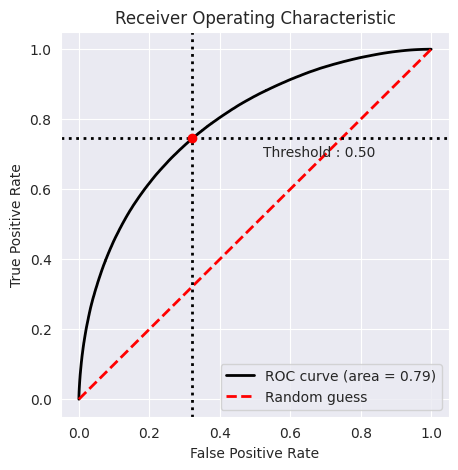

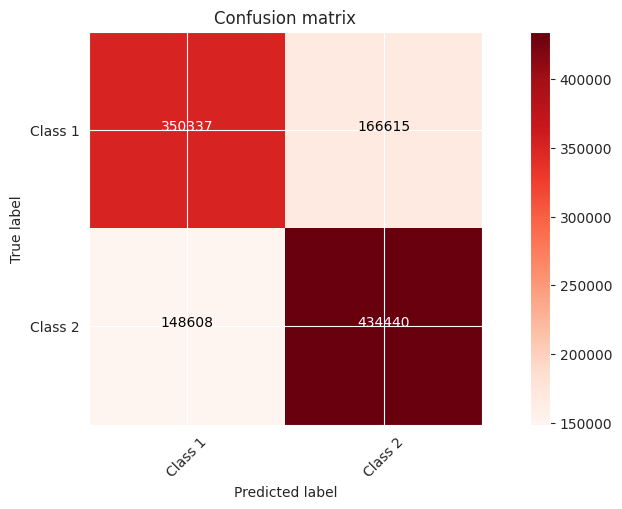

In [ ]:
y_test_pred = ada_clf.predict_proba(X_test)[:, 1]

from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric
bc_higgs = BinaryClassification(y_test, y_test_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
_,_,_,auc = bc_higgs.plot_roc_curve()
print("AUC:", auc)
plt.show()

plt.figure(figsize=(10,5))
bc_higgs.plot_confusion_matrix()
plt.show()

# Deliverables:

**Reminder: The hackathon tasks should be done using the Higgs dataset.** <br>
A pdf of the notebook with all three hackathon tasks completed. <br>
A copy of your colab/jupyter notebook with all three hackathon tasks completed. <br>


File name convention: For group 42 and memebers Richard Stallman and Linus <br>
Torvalds it would be "Hackathon1_42_Stallman_Torvalds.pdf" and  <br>
"Hackathon1_42_Stallman_Torvalds.ipynb".

Submission via blackboard (UA).